In [2]:
%matplotlib inline

In [3]:
import os
import numpy as np
import json
from ipywidgets import interact
import matplotlib.pyplot as plt
if 'cd' not in globals():
    cd = True
    os.chdir('..')

In [4]:
# colors = {
#     'train': 'b',
#     'Croatian': 'r',
#     'German': 'g',
#     'French': 'y',
#     'valid': 'c',
#     'Czech': 'm',
#     'Bulgarian': 'k',
#     'Polish': '#808080',
# }

# data = {}

# all_langs = ['Croatian', 'German', 'French', 'Czech', 'Bulgarian', 'Polish', 'train', 'valid']

# all_langs = ['Croatian', 'German', 'French', 'train', 'valid']

In [4]:
def get_cer(plot_dir):
    data = []
    for folder in os.listdir(plot_dir):
            if folder.startswith('snapshot.ep.'):
                ep = int(folder.strip('snapshot.ep.'))
                with open(f'{plot_dir}/{folder}/result.txt', 'r', encoding="utf-8") as f:
                    for l in f:
                        if 'Sum/Avg' in l:
                            pter = float(l.strip().strip('|').strip().split()[-2])
                            data.append((ep, pter))
                            break

    data = sorted(data, key=lambda x: x[0])
    eps, pters = zip(*data)
    return np.array(eps), np.array(pters)

def get_cer_with_cache(plot_dir, cache_data):
    if plot_dir in cache_data:
        eps, pters = cache_data[plot_dir]
    else:
        eps, pters = get_cer(plot_dir)
        cache_data[plot_dir] = eps, pters
    return eps, pters


In [5]:
import pickle as pk
with open('phones/lang2ph.json', 'r') as f:
    lang2ph = json.load(f)
    
def count_common_phone(l1, l2):
    nl1 = len(lang2ph[l1])
    nl2 = len(lang2ph[l2])
    nc = len(set(lang2ph[l1]).intersection(lang2ph[l2]))
#     print(f'{l1}: #{nl1} {l2}: #{nl2} common: #{nc}')
    s = f'{l1}: #{nl1} {l2}: #{nl2} common: #{nc}'
    return s

# LEMB

In [6]:
recog_langs = ['Spanish', 'Polish', 'Croatian', '203', '101']
fake_lang_labels = ['CR', 'PL', 'SP', 'PO', 'TU', 'GE', 'BG', 'TH', 'CH', 'FR', 'CZ', '203', '101', 'N', '404', '402', '307', '206', '107', '103']
langs = ['Croatian', 'Polish', 'Spanish', 'Portuguese', 'Turkish', 'German', 'Bulgarian', 'Thai', 'Mandarin', 'French', 'Czech', '203', '101', '505', '404', '402', '307', '206', '107', '103']
lang_labels = ['CR', 'PL', 'SP', 'PO', 'TU', 'GE', 'BG', 'TH', 'CH', 'FR', 'CZ', '203', '101', 'N', '404', '402', '307', '206', '107', '103']
train_langs = ['Portuguese', 'Turkish', 'German', 'Bulgarian', 'Thai', 'Mandarin', 'French', 'Czech', '505', '404', '402', '307', '206', '107', '103']
lang2label = {lang: label for lang, label in zip(langs, lang_labels)}

In [7]:
cache_data = {}

### linear language embedding test pter with fake labels
- Spanish
    - 103 (Bengali), SP, PO
- Polish
    - PL, 404 (Georgian), 402 (Javanese), CR, CZ
- Croatian
    - 103 (Bengali), PL, 

In [8]:
max_epoch = 9
# fake_lang_labels=['CR']
@interact
def update(i_recog_lang=(0,len(recog_langs)-1)):
    recog_lang = recog_langs[i_recog_lang]
    print(recog_lang)
    plt.figure(figsize=(20,15))
    for ii, fll in enumerate(fake_lang_labels):
        plot_dir = f'exp/train_pytorch_wav2vecfexlemb_x/plot_eval_{recog_lang}_{fll}_decode'
        eps, pters = get_cer_with_cache(plot_dir, cache_data)
        plt.plot(eps, pters, label=f'{recog_lang}_'+fll)
        min_ep = eps[np.argmin(pters)]
        plt.text(eps[ii%max_epoch], pters[ii%max_epoch], f'{fll}')
    # baseline
    plot_dir = f'exp/train_pytorch_wav2vecfex_x/plot_eval_{recog_lang}_decode'
    eps, pters = get_cer_with_cache(plot_dir, cache_data)
    plt.plot(eps, pters, label=f'{recog_lang}_base', linestyle='--')
    
    plot_dir = f'exp/train_pytorch_wav2vecfex_x/plot_mask_eval_{recog_lang}_decode'
    eps, pters = get_cer_with_cache(plot_dir, cache_data)
    plt.plot(eps, pters, label=f'{recog_lang}_base', linestyle='--')
#         common_s = count_common_phone(lang2langlabel[recog_lang], fll)
#         print(f'Lang: {recog_lang} Lang_label: {fll} min_ep: {min_ep} min_pter: {np.min(pters)} {common_s}')
        
    plt.legend()

interactive(children=(IntSlider(value=2, description='i_recog_lang', max=4), Output()), _dom_classes=('widget-…

In [12]:
max_epoch = 9
# fake_lang_labels=['CR']
@interact
def update(i_recog_lang=(0,len(recog_langs)-1)):
    recog_lang = recog_langs[i_recog_lang]
    print(recog_lang)
    plt.figure(figsize=(20,15))
    for ii, fll in enumerate(fake_lang_labels):
        plot_dir = f'exp/train_pytorch_wav2vecfexlemb_x/plot_mask_eval_{recog_lang}_{fll}_decode'
        eps, pters = get_cer_with_cache(plot_dir, cache_data)
        plt.plot(eps, pters, label=f'{recog_lang}_'+fll)
        min_ep = eps[np.argmin(pters)]
        plt.text(eps[ii%max_epoch], pters[ii%max_epoch], f'{fll}')
    # baseline
    plot_dir = f'exp/train_pytorch_wav2vecfex_x/plot_eval_{recog_lang}_decode'
    eps, pters = get_cer_with_cache(plot_dir, cache_data)
    plt.plot(eps, pters, label=f'{recog_lang}_base', linestyle='--')
    
    plot_dir = f'exp/train_pytorch_wav2vecfex_x/plot_mask_eval_{recog_lang}_decode'
    eps, pters = get_cer_with_cache(plot_dir, cache_data)
    plt.plot(eps, pters, label=f'{recog_lang}_base', linestyle='--')
#         common_s = count_common_phone(lang2langlabel[recog_lang], fll)
#         print(f'Lang: {recog_lang} Lang_label: {fll} min_ep: {min_ep} min_pter: {np.min(pters)} {common_s}')
        
    plt.legend()

interactive(children=(IntSlider(value=2, description='i_recog_lang', max=4), Output()), _dom_classes=('widget-…

In [ ]:
max_epoch = 9
# fake_lang_labels=['CR']
@interact
def update(i_recog_lang=(0,len(recog_langs)-1)):
    recog_lang = recog_langs[i_recog_lang]
    print(recog_lang)
    plt.figure(figsize=(20,15))
    for ii, fll in enumerate(fake_lang_labels):
        plot_dir = f'exp/train_pytorch_wav2vecfexlemb_x/plot_mask_eval_{recog_lang}_{fll}_decode'
        eps, pters = get_cer_with_cache(plot_dir, cache_data)
        plt.plot(eps, pters, label=f'{recog_lang}_'+fll)
        min_ep = eps[np.argmin(pters)]
        plt.text(eps[ii%max_epoch], pters[ii%max_epoch], f'{fll}')
    # baseline
    plot_dir = f'exp/train_pytorch_wav2vecfex_x/plot_eval_{recog_lang}_decode'
    eps, pters = get_cer_with_cache(plot_dir, cache_data)
    plt.plot(eps, pters, label=f'{recog_lang}_base', linestyle='--')
    
    plot_dir = f'exp/train_pytorch_wav2vecfex_x/plot_mask_eval_{recog_lang}_decode'
    eps, pters = get_cer_with_cache(plot_dir, cache_data)
    plt.plot(eps, pters, label=f'{recog_lang}_base', linestyle='--')
#         common_s = count_common_phone(lang2langlabel[recog_lang], fll)
#         print(f'Lang: {recog_lang} Lang_label: {fll} min_ep: {min_ep} min_pter: {np.min(pters)} {common_s}')
        
    plt.legend()

interactive(children=(IntSlider(value=2, description='i_recog_lang', max=4), IntSlider(value=9, description='i…

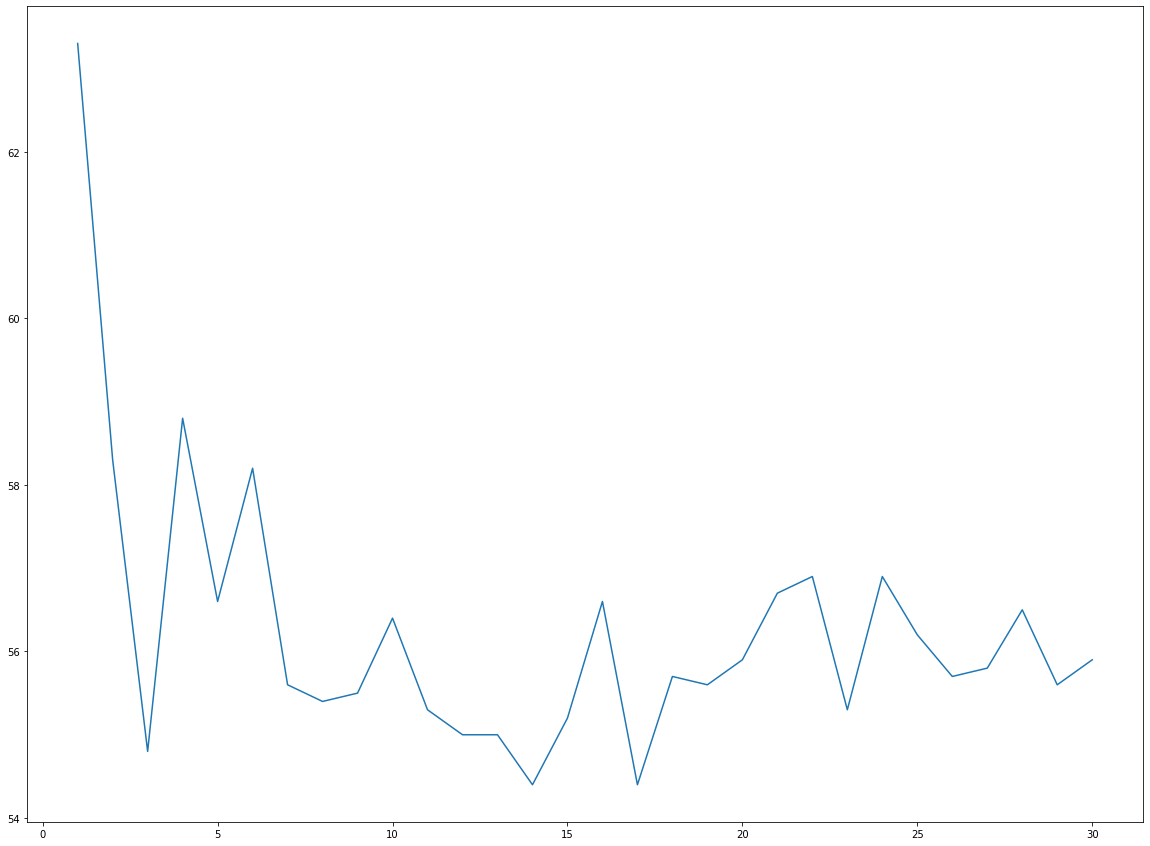

In [11]:

# fake_lang_labels=['CR']
@interact
def update(i_recog_lang=(0,len(recog_langs)-1), i_fake_lang_label=(0,len(fake_lang_labels)-1)):
    recog_lang = recog_langs[i_recog_lang]
    fll = fake_lang_labels[i_fake_lang_label]
    print(recog_lang, fll)
    plt.figure(figsize=(20,15))
#     for fll in fake_lang_labels:
    plot_dir = f'exp/train_pytorch_wav2vecfexlemb/plot_mask_eval_{recog_lang}_{fll}_decode'
    eps, pters = get_cer_with_cache(plot_dir, cache_data)
    plt.plot(eps, pters, label=f'{recog_lang}_'+fll)
    min_ep = eps[np.argmin(pters)]
    # baseline
    plot_dir = f'exp/train_pytorch_wav2vecfex/plot_eval_{recog_lang}_decode'
    eps, pters = get_cer_with_cache(plot_dir, cache_data)
    plt.plot(eps, pters, label=f'{recog_lang}_'+'base', linestyle='--')
    plot_dir = f'exp/train_pytorch_wav2vecfex/plot_mask_eval_{recog_lang}_decode'
    eps, pters = get_cer_with_cache(plot_dir, cache_data)
    plt.plot(eps, pters, label=f'{recog_lang}_'+'base', linestyle='--')
#         common_s = count_common_phone(lang2langlabel[recog_lang], fll)
#         print(f'Lang: {recog_lang} Lang_label: {fll} min_ep: {min_ep} min_pter: {np.min(pters)} {common_s}')
        
    plt.legend()

# LGCN

In [55]:
max_epoch = 9
# fake_lang_labels=['CR']
@interact
def update(i_recog_lang=(0,len(recog_langs)-1)):
    recog_lang = recog_langs[i_recog_lang]
    print(recog_lang)
    plt.figure(figsize=(20,15))
    for ii, fll in enumerate(fake_lang_labels):
        plot_dir = f'exp/train_pytorch_wav2vecfexlgcn/plot_eval_{recog_lang}_{fll}_decode'
        eps, pters = get_cer_with_cache(plot_dir, cache_data)
        plt.plot(eps[:max_epoch], pters[:max_epoch], label=f'{recog_lang}_'+fll)
        min_ep = eps[np.argmin(pters)]
#         loc = eps[ii]
#         plt.text(eps[max_epoch-1], pters[max_epoch-1], f'{fll}')
        plt.text(eps[ii%max_epoch], pters[ii%max_epoch], f'{fll}')
    # baseline
    plot_dir = f'exp/train_pytorch_wav2vecfex/plot_eval_{recog_lang}_decode'
    eps, pters = get_cer_with_cache(plot_dir, cache_data)
    plt.plot(eps[:12], pters[:12], label=f'{recog_lang}_base', linestyle='--')
#         common_s = count_common_phone(lang2langlabel[recog_lang], fll)
#         print(f'Lang: {recog_lang} Lang_label: {fll} min_ep: {min_ep} min_pter: {np.min(pters)} {common_s}')
        
    plt.legend()

interactive(children=(IntSlider(value=2, description='i_recog_lang', max=4), Output()), _dom_classes=('widget-…

In [58]:
max_epoch = 9
# fake_lang_labels=['CR']
@interact
def update(i_recog_lang=(0,len(recog_langs)-1), i_fake_lang_label=(0,len(fake_lang_labels)-1)):
    recog_lang = recog_langs[i_recog_lang]
    fll = fake_lang_labels[i_fake_lang_label]
    print(recog_lang, fll)
    plt.figure(figsize=(10,8))
#     for fll in fake_lang_labels:
    plot_dir = f'exp/train_pytorch_wav2vecfexlgcn/plot_eval_{recog_lang}_{fll}_decode'
    eps, pters = get_cer_with_cache(plot_dir, cache_data)
    plt.plot(eps[:max_epoch], pters[:max_epoch], label=f'{recog_lang}_'+fll)
    min_ep = eps[np.argmin(pters)]
    # baseline
    plot_dir = f'exp/train_pytorch_wav2vecfex/plot_eval_{recog_lang}_decode'
    eps, pters = get_cer_with_cache(plot_dir, cache_data)
    plt.plot(eps[:12], pters[:12], label=f'{recog_lang}_base', linestyle='--')
#         common_s = count_common_phone(lang2langlabel[recog_lang], fll)
#         print(f'Lang: {recog_lang} Lang_label: {fll} min_ep: {min_ep} min_pter: {np.min(pters)} {common_s}')
        
    plt.legend()

interactive(children=(IntSlider(value=2, description='i_recog_lang', max=4), IntSlider(value=9, description='i…

# lgcn

In [72]:
import matplotlib.cm as cm

In [67]:
langs = ['Croatian', 'Polish', 'Spanish', 'Portuguese', 'Turkish', 'German', 'Bulgarian', 'Thai', 'Mandarin', 'French', 'Czech', '203', '101', '505', '404', '402', '307', '206', '107', '103']
lang_labels = ['CR', 'PL', 'SP', 'PO', 'TU', 'GE', 'BG', 'TH', 'CH', 'FR', 'CZ', '203', '101', 'N', '404', '402', '307', '206', '107', '103']
train_langs = ['Portuguese', 'Turkish', 'German', 'Bulgarian', 'Turkish', 'Mandarin', 'French', 'Czech', '505', '404', '402', '307', '206', '107', '103']
lang2label = {lang: label for lang, label in zip(langs, lang_labels)}

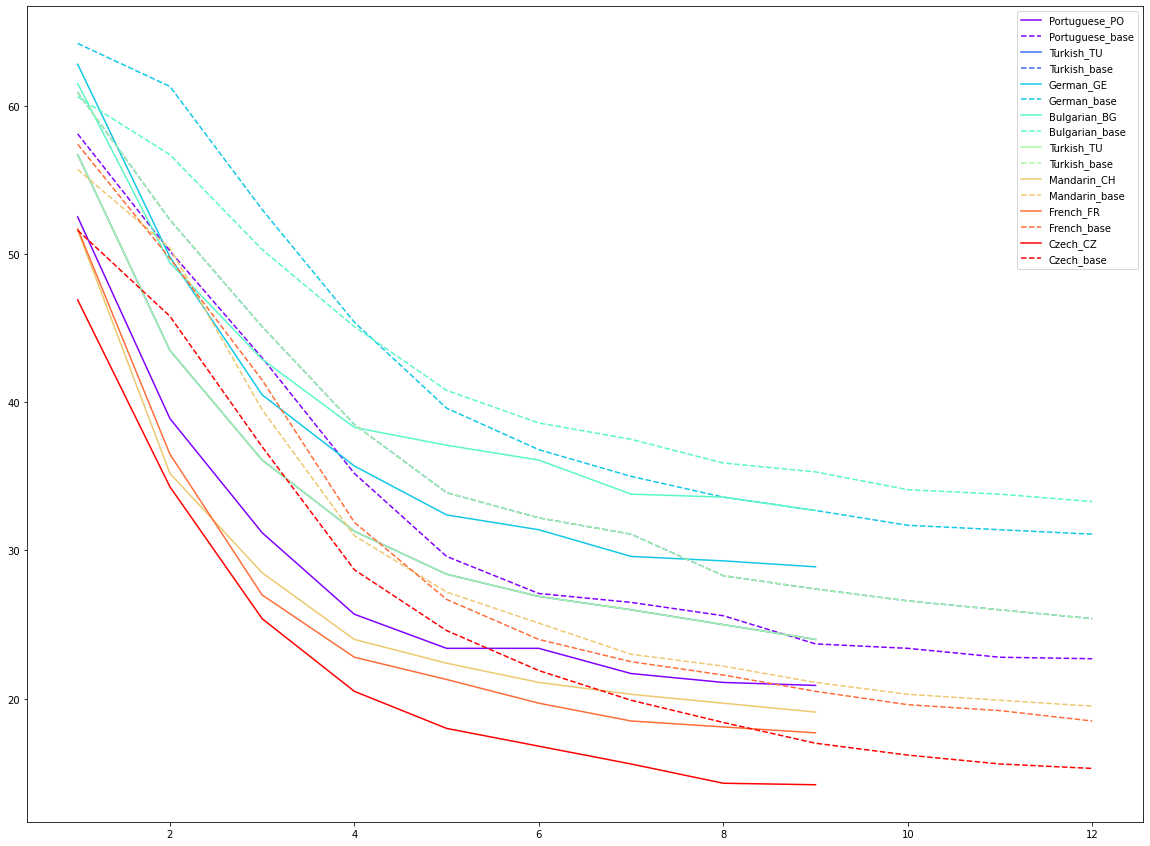

In [79]:
max_epoch=9
train_langs = ['Portuguese', 'Turkish', 'German', 'Bulgarian', 'Turkish', 'Mandarin', 'French', 'Czech']
colors = cm.rainbow(np.linspace(0, 1, len(train_langs)))
plt.figure(figsize=(20,15))
for i, lang in enumerate(train_langs):
    label = lang2label[lang]
    plot_dir = f'exp/train_pytorch_wav2vecfexlgcn/plot_eval_{lang}_{label}_decode'
    base_plot_dir = f'exp/train_pytorch_wav2vecfex/plot_eval_{lang}_decode'
    if not os.path.exists(base_plot_dir): continue
    eps, pters = get_cer_with_cache(plot_dir, cache_data)
    plt.plot(eps[:max_epoch], pters[:max_epoch], label=f'{lang}_'+label, color=colors[i])
    
    base_plot_dir = f'exp/train_pytorch_wav2vecfex/plot_eval_{lang}_decode'
    eps, pters = get_cer_with_cache(base_plot_dir, cache_data)
    plt.plot(eps[:12], pters[:12], label=f'{lang}_base', linestyle='--', color=colors[i])
plt.legend()

# lemb

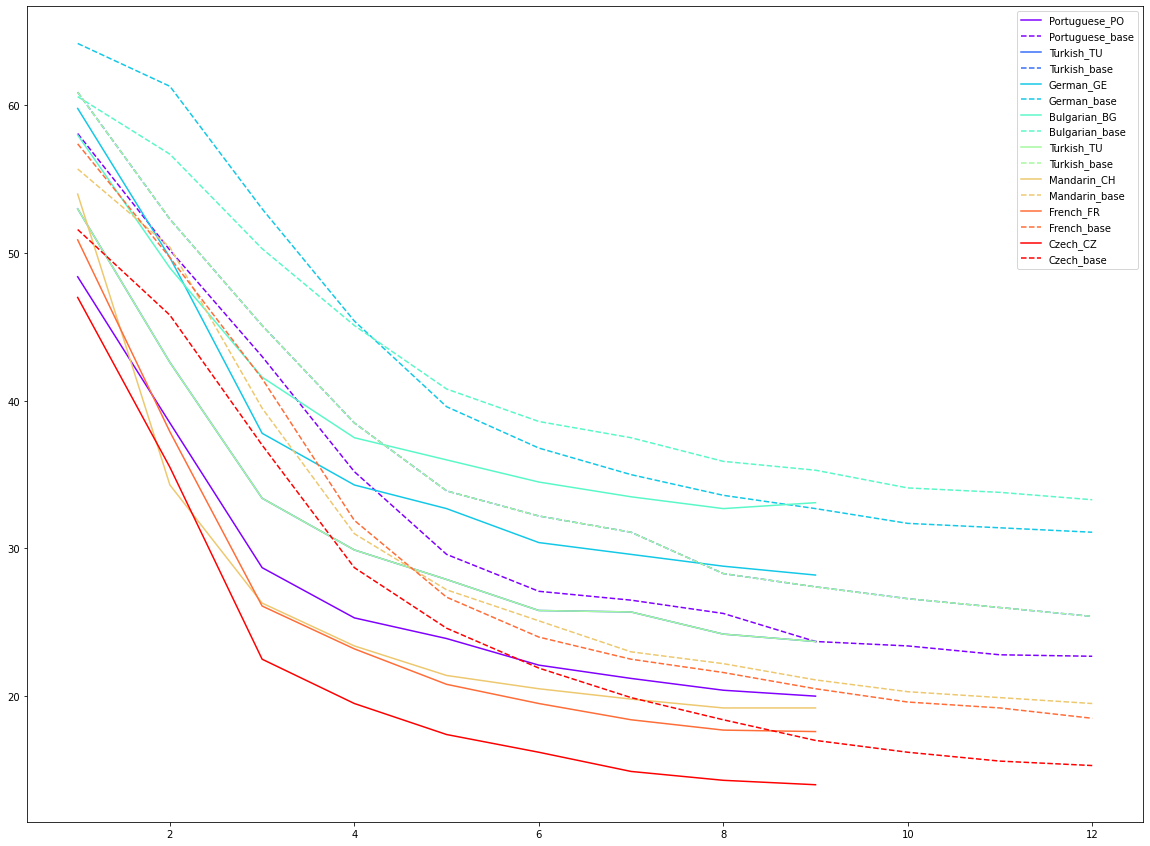

In [80]:
max_epoch=9
train_langs = ['Portuguese', 'Turkish', 'German', 'Bulgarian', 'Turkish', 'Mandarin', 'French', 'Czech']
colors = cm.rainbow(np.linspace(0, 1, len(train_langs)))
plt.figure(figsize=(20,15))
for i, lang in enumerate(train_langs):
    label = lang2label[lang]
    plot_dir = f'exp/train_pytorch_wav2vecfexlemb/plot_eval_{lang}_{label}_decode'
    base_plot_dir = f'exp/train_pytorch_wav2vecfex/plot_eval_{lang}_decode'
    if not os.path.exists(base_plot_dir): continue
    eps, pters = get_cer_with_cache(plot_dir, cache_data)
    plt.plot(eps[:max_epoch], pters[:max_epoch], label=f'{lang}_'+label, color=colors[i])
    
    base_plot_dir = f'exp/train_pytorch_wav2vecfex/plot_eval_{lang}_decode'
    eps, pters = get_cer_with_cache(base_plot_dir, cache_data)
    plt.plot(eps[:12], pters[:12], label=f'{lang}_base', linestyle='--', color=colors[i])
plt.legend()